# MMS1 Summary Plot for 2023-03-24 #

A typical first step in a PySPEDAS workflow would be to look at a summary plot for one or more missions, typically showing about a day's worth of data from multiple instruments, and perhaps other related data such as geomagnetic indices, solar wind parameters, ground-based data, or orbit data.

PySPEDAS has an overview plot generator for MMS, so we'll use it to look at data from MMS-1 for the day of the event we're studying, March 24, 2023.

mms_overview_plot takes a date and an MMS probe identifier, and by default plots a full day's worth of data.

Note:  This notebook requires more than 8 GB of memory to load all the data it needs to generate the plot.  Our heliocloud environment might not have enough memory to run it,

10-May-24 12:01:49: /Users/jwl/PycharmProjects/summer-school-24/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(

10-May-24 12:01:49: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l1/mag/idx/2023/
10-May-24 12:01:50: Downloading http://themis.ssl.berkeley.edu/data/themis/thg/l1/mag/idx/2023/thg_l1_idx_20230324_v01.cdf to themis_data/thg/l1/mag/idx/2023/thg_l1_idx_20230324_v01.cdf
10-May-24 12:01:50: Download complete: themis_data/thg/l1/mag/idx/2023/thg_l1_idx_20230324_v01.cdf
10-May-24 12:01:52: Loading pydata/mms1/fgm/srvy/l2/2023/03/mms1_fgm_srvy_l2_20230324_v5.393.0.cdf
10-May-24 12:01:56: Downloading mms1_epd-eis_srvy_l2_extof_20230324_v5.0.100.cdf to pydata/mms1/epd-eis/srvy/l2/extof/2023/03
10-May-24 12:02:15: mms1_epd_eis_srvy_l2_extof_proton_P5_cps_t5 co

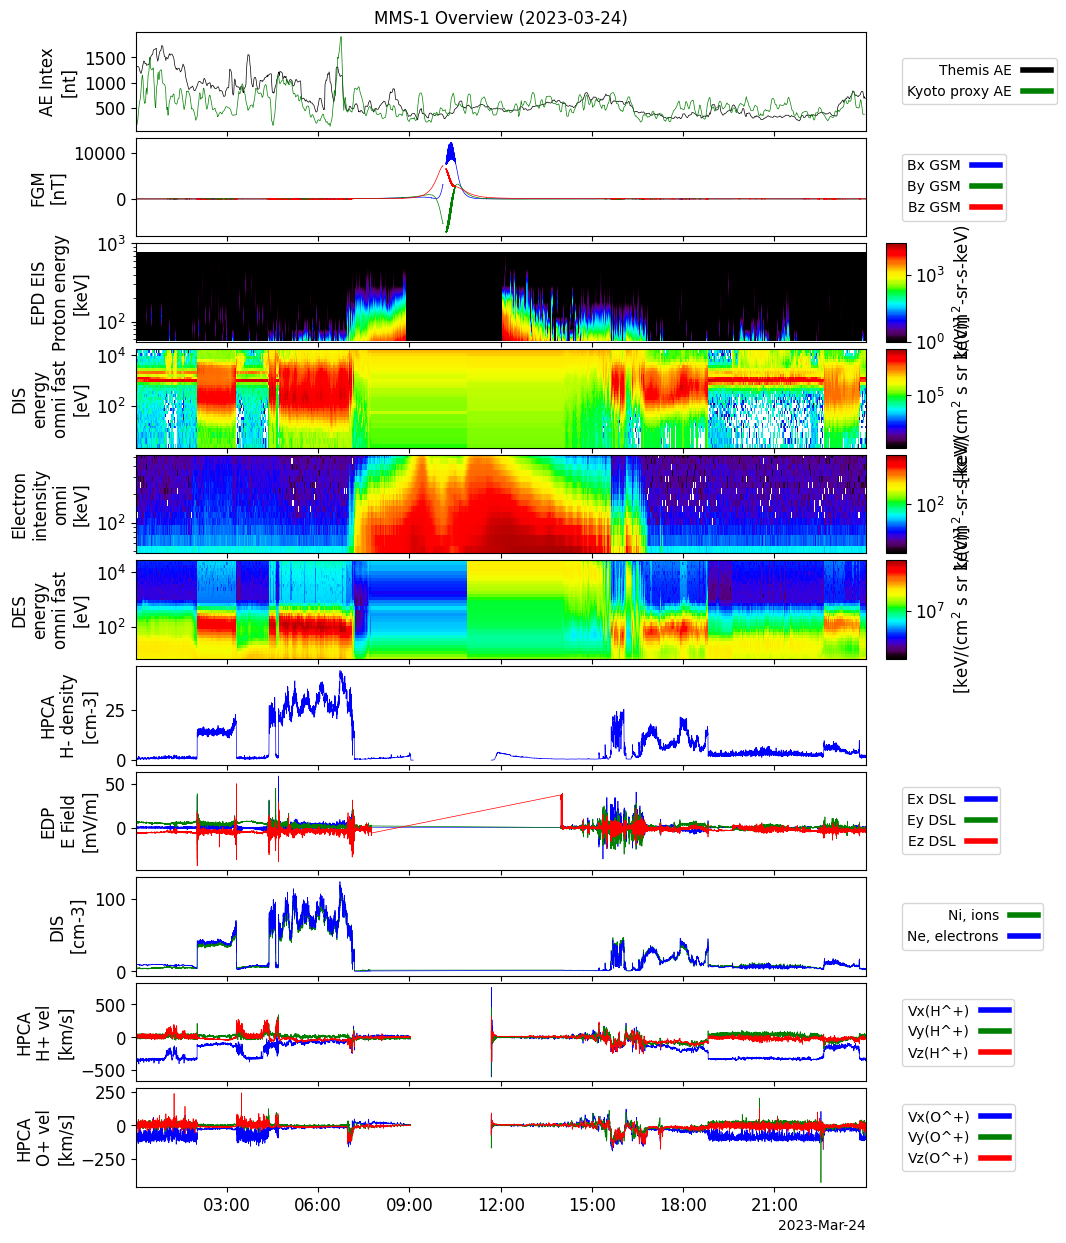

10-May-24 12:11:49: MMS overview plot completed.


In [1]:
import pyspedas
import pytplot

pyspedas.mms_overview_plot(date='2023-03-24',probe='1',ysize=15)


# Interpreting the plot #

The data displayed in the top panel doesn't come from MMS -- it shows two approximations of the Auroral Electrojet (AE) index.  Production of the definitive AE index from a standard set of ground magnetometer stations can lag by months or years, so it's not useful for near real-time analysis.  Instead, we use a so-called "Kyoto proxy AE" index, derivied from some near-real-time plots available from the Kyoto World Data Center, and a "THEMIS AE index" derived from a set of ground magnetometers operated in conjunction with the THEMIS satellite mission.  Higher values of the AE index indicate more geomagnetic activity.

Panel 2 shows the MMS-1 magnetic field measurements.   The peak indicates when MMS-1 was near perihelion. (This is more useful when zooming into shorter time intervals, or reducing the Y range so the strong fields near perigee don't dominate the plot.)

Panels 3-6 show energy spectrograms from the MMS particle instruments: two panels for protons, then two for electrons.  It looks like are some data gaps around perigee.  

Panel 7 shows proton density from the HPCA (Hot Plasma Composition Analyzer) instrument

Panel 8 shows the electric field measurements.

Panel 9 shows electron and ion densities.

Panels 10 and 11 show velocity measurements for protons and oxygen ions from the HPCA instrument.

Several regions of interest can be seen, especially in the particle densities and energies:

2-5 hours UTC: Multiple inbound bow shock crossings

5-7 hours UTC: Inbound magnetopause crossings

~7 hours UTC: Possible reconnection signature (fast ion flows with direction reversal)

~7-16 hours UTC: Within the magnetosphere

16-24 hours UTC: Outbound magnetopause and bow shock crossings


# Inbound magnetopause crossing #

Let's take a closer look at inbound magnetopause crossing.  We'll zoom in on a 8-hour time interval starting at 01:00 UTC, and show the AE index, magnetic field, bulk ion velocity, and particle densities.  We'll also load and plot some OMNI solar wind parameters. 


10-May-24 15:31:43: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2023/
10-May-24 15:31:44: File is current: omni_data/hro2_1min/2023/omni_hro2_1min_20230301_v01.cdf


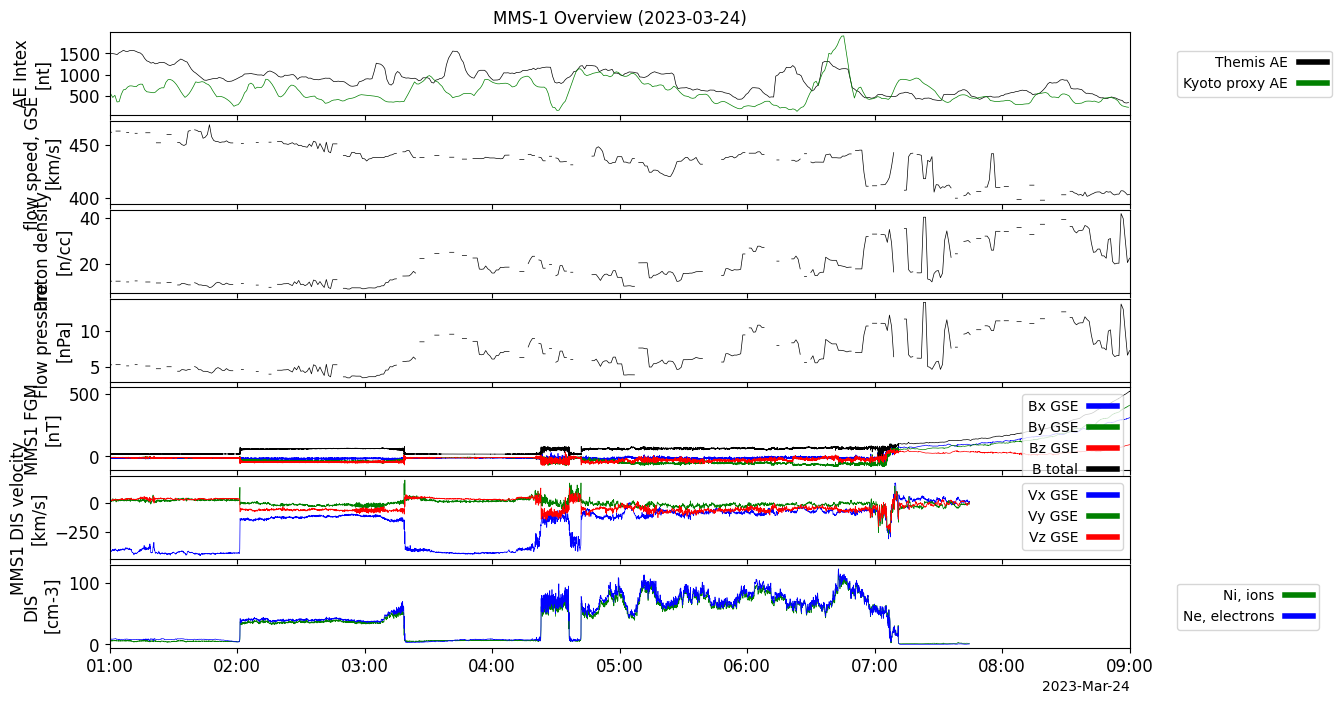

In [13]:
import pytplot

# We're particularly intersted in 'Pressure', the solar wind dynamic pressure from the OMNI dataset, and the proton speed and density.

pyspedas.omni.data(trange=['2023-03-24', '2023-03-25'])

# Zoom in on the time range of interest
pytplot.timespan('2023-03-24 01:00',8,"hours")

# Make a plot for the restricted time range
pytplot.tplot(['thg_idx_combined','flow_speed', 'proton_density', 'Pressure', 'mms1_fgm_b_gse_srvy_l2', 'mms1_dis_bulkv_gse_fast','mms1_fpi_density'])


# Magnetopause crossing events #

From 01:00 to 02:00, MMS-1 was in the solar wind.  At 02:00 it encounters the bow shock and enters the magnetosheath.  Around 03:00 we can see the solar wind proton density start to increase, with the flow speed remaining steady at about 440 km/sec, which increases the dynamic pressure.  

As shown in the "MMS, THEMIS, Arase orbits" notebook, higher dynamic pressure causes the magnetopause to move inward -- in this case, pushing it inward enough so that MMS-1 finds itself back in the solar wind between 03:15 and 04:20.  The solar wind density and pressure start decreasing around 3:45, and around 04:30 MMS-1 encounters the bow shock for a second time.  A small increasse in the pressure is visible at around 04:15, and MMS-1 is briefly back in the solar wind around 04:40 - 04:50, when it crosses the bow shock for a third time.

From 04:40 - 07:10, MMS-1 is in the magnetosheath.  Near the end of this period, the magnetic field changes direction, and fast ion flows are encountered and also change direction -- this is the signature of a magnetic reconnection event.

From about 7:10 on, MMS-1 is fully within the magnetosphere. Bz has turned from negative in the solar wind, to positive in Earth's magnetic field, and the particle density is lower than previously seen in the solar wind and magnetosheath.